Homework 4:

Write a short (2 page) paper that introduces, solves, and discusses the results from these problems below.

Start from the 1D and 2D Ising model programs we discussed in class

https://colab.research.google.com/drive/1xUB48UpB4Z87yPl2hJ8-8p4wBsH2wKcN?usp=sharing 

https://colab.research.google.com/drive/1eNzGeLRa8N3uPA-N8Sd0rNSnNZLITNQI?usp=sharing 

 - Do as much of 17.4.2 "Equilibration, Thermodynamic Properties (Assessment)" as you can

https://docs.google.com/document/d/1nn-2GkRX4fjEr5y_usLedcZbWkXo9FufTLlJKmo9WK8/edit?tab=t.iw19628hmo7s

In [70]:
import numpy as np
from vpython import canvas, arrow, vector, color, rate, graph, gcurve
import matplotlib.pyplot as plt

## Simulation

In [71]:
# parameters
N = 30           
steps = 300   

def calc_energy(config):
    energy = 0
    for i in range(N):
        S = config[0, i]
        nb = config[0, (i + 1) % N] + config[0, (i - 1) % N]
        energy += -nb * S
    return energy / 2.0

def run_ising_sim(T):
    beta = 1.0 / T
    config = 2 * np.random.randint(1, size=(1, N)) - 1  # cold start

    sim = np.zeros((steps, N + 1))  # N spins + energy per step

    for step in range(steps):
        b = np.random.randint(0, N)
        s = config[0, b]
        nb = config[0, (b + 1) % N] + config[0, (b - 1) % N]
        cost = 2 * s * nb

        if cost < 0 or np.random.rand() < np.exp(-cost * beta):
            config[0, b] *= -1

        E = calc_energy(config)
        sim[step, :-1] = config
        sim[step, -1] = E

    return sim

In [57]:
run_ising_sim(1.0)

array([[ -1.,  -1.,  -1., ...,  -1.,  -1., -30.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -30.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -30.],
       ...,
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -26.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -26.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -26.]])

## Visualization

In [72]:
def visualize(sim):
    steps, total = sim.shape
    N = total - 1  # Number of spins

    scene = canvas(title="Ising Model Visualization", width=600, height=400, background=color.black)
    graph(title="Energy Over Time", xtitle="Step", ytitle="Energy", fast=False, height=200, width=500)
    energy_curve = gcurve(color=color.cyan)

    arrows = []
    for i in range(N):
        s = sim[0, i]
        a = arrow(pos=vector(i - N / 2, 0, 0),
                  axis=vector(0, s, 0),
                  color=color.yellow if s == 1 else color.white,
                  shaftwidth=0.3)
        arrows.append(a)

    for step in range(steps):
        rate(60)
        config = sim[step, :-1]
        energy = sim[step, -1]

        for i in range(N):
            spin = config[i]
            arrows[i].axis = vector(0, spin, 0)
            arrows[i].color = color.yellow if spin == 1 else color.white

        energy_curve.plot(step, energy)

In [73]:
visualize(run_ising_sim(1.0))

<IPython.core.display.Javascript object>

In [60]:
visualize(run_ising_sim(100.0))

<IPython.core.display.Javascript object>

## Analysis

### Fluctuation

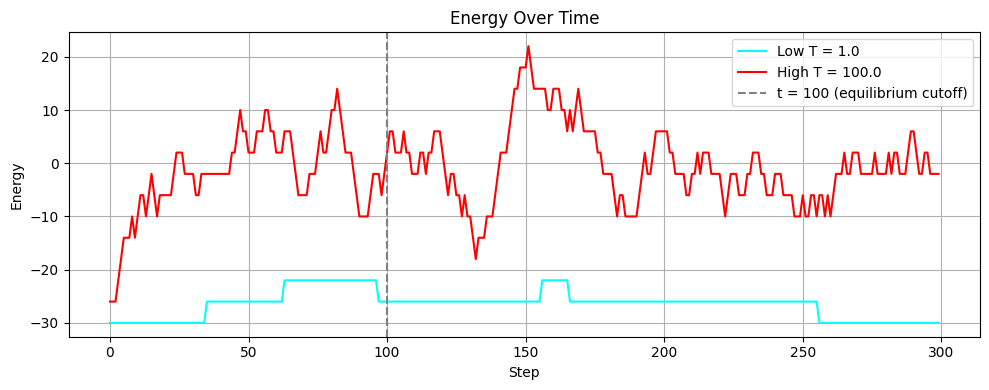

In [61]:
sim_low = run_ising_sim(1.0)
sim_high = run_ising_sim(100.0)

plt.figure(figsize=(10, 4))
plt.plot(sim_low[:, -1], label='Low T = 1.0', color='cyan')
plt.plot(sim_high[:, -1], label='High T = 100.0', color='red')
plt.axvline(x=100, linestyle='--', color='gray', label='t = 100 (equilibrium cutoff)')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Energy Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

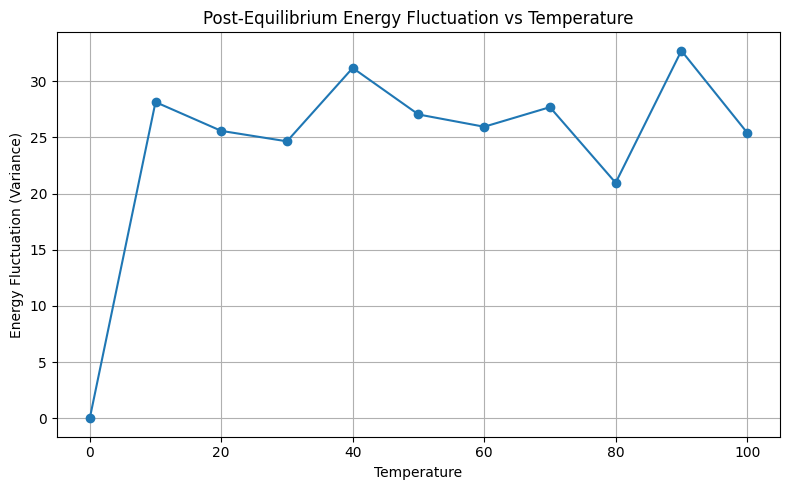

In [62]:
temperatures = list(range(0, 101, 10))
equilibrium_cutoff = 100
runs_per_temp = 5

avg_variances = []

for T in temperatures:
    if T == 0:
        avg_variances.append(0)
        continue
    
    variances = []
    for _ in range(runs_per_temp):
        sim = run_ising_sim(T)
        post_eq_energy = sim[equilibrium_cutoff:, -1]
        var = np.var(post_eq_energy)
        variances.append(var)

    avg_variances.append(np.mean(variances))

plt.figure(figsize=(8, 5))
plt.plot(temperatures, avg_variances, marker='o')
plt.xlabel("Temperature")
plt.ylabel("Energy Fluctuation (Variance)")
plt.title("Post-Equilibrium Energy Fluctuation vs Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

### Domain Count

In [63]:
def count_domains(config):
    return np.sum(config[1:] != config[:-1]) + 1

temperatures = [1.0, 100.0]
runs_per_temp = 10

summary_data = {}

for T in temperatures:
    energies = []
    domain_counts = []
    domain_sizes = []

    for _ in range(runs_per_temp):
        sim = run_ising_sim(T)
        final_config = sim[-1, :-1]
        final_energy = sim[-1, -1]
        domains = count_domains(final_config)
        size = N / domains

        energies.append(final_energy)
        domain_counts.append(domains)
        domain_sizes.append(size)

    summary_data[T] = {
        "avg_energy": np.mean(energies),
        "avg_domain_count": np.mean(domain_counts),
        "avg_domain_size": np.mean(domain_sizes)
    }

for T in summary_data:
    print(f"Temperature: {T}")
    print(f"  Avg Energy:        {summary_data[T]['avg_energy']:.2f}")
    print(f"  Avg Domain Count:  {summary_data[T]['avg_domain_count']:.1f}")
    print(f"  Avg Domain Size:   {summary_data[T]['avg_domain_size']:.2f}")
    print()

Temperature: 1.0
  Avg Energy:        -24.40
  Avg Domain Count:  3.8
  Avg Domain Size:   13.89

Temperature: 100.0
  Avg Energy:        -2.80
  Avg Domain Count:  14.3
  Avg Domain Size:   2.23



### Domain Size

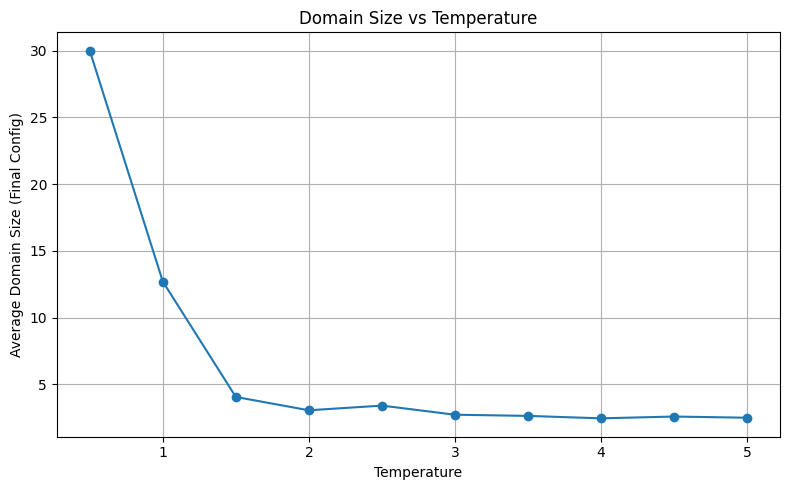

In [64]:
temps = np.linspace(0.5, 5.0, 10)
runs_per_temp = 10
avg_domain_sizes = []

for T in temps:
    domain_sizes = []
    for _ in range(runs_per_temp):
        sim = run_ising_sim(T)
        final_config = sim[-1, :-1]
        domain_count = np.sum(final_config[1:] != final_config[:-1]) + 1
        domain_sizes.append(N / domain_count)
    avg_domain_sizes.append(np.mean(domain_sizes))

plt.figure(figsize=(8, 5))
plt.plot(temps, avg_domain_sizes, marker='o')
plt.xlabel("Temperature")
plt.ylabel("Average Domain Size (Final Config)")
plt.title("Domain Size vs Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()